# Introduction to supervised learning 

Let's practice the material that was discussed during the lecture. Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.

**Homework #1** associated with this practice session is linked on the homework's page, the deadline is **September 18, Sunday, midnight (23:59 EET time)**


## Introducing Colaboratory (Colab)
**Colaboratory**, is a great tool created by Google for individuals interested in getting a hands-on experience with Machine Learning (including Deep Learning). It offers a free CPU/**GPU** quota and a preconfigured virtual machine instance set up for to run Tensorflow and Keras libraries using a Jupyter notebook instance. **In one sentence, it is a perfect “getting started” point for experimentation with neural networks for any part-time hobbist or computer nerd**.

*Introductory text by Oleg Żero (https://zerowithdot.com/colab-workspace/).*


In [ ]:
!ls

sample_data


## Classification with KNN on MNIST
We shall use classical MNIST dataset to practice one of the simplest machine learning algorithms - Nearest Neighbour algorithm and its extension - K-Nearest Neighbour algorithm. MNIST stands for Mixed National Institute of Standards and Technology and contains almost 60000 small square 28×28 pixel grayscale images of digits from 0 to 9. Let's load it!

### Setup: 
Here we will load necessary libraries (NumPy and Pandas) and MNIST dataset 

In [ ]:
import numpy as np # for matrix stuff
import pandas as pd # to work with datasets
import matplotlib.pyplot as plt # subjectively ugly plotting here
from seaborn import countplot # a bit less ugly plotting

Getting MNIST dataset from Keras library

In [ ]:
from tensorflow.keras.datasets import mnist
(images, labels),(_, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
images = images / 255 # normalising images

We check the dimensionality of the downloaded images:

In [ ]:
print(f"images are of shape: {images.shape} and labels: {labels.shape}")

images are of shape: (60000, 28, 28) and labels: (60000,)


### Visualising MNIST

Let's look into the first image:

In [ ]:
print(images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

That was not super helpful, can we make it more human friendly?

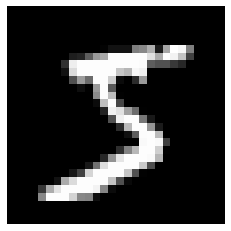

In [ ]:
plt.imshow(images[0], plt.get_cmap('gray'));
plt.axis('off')
plt.show()

What is the label of this image?

In [ ]:
print (f"Correct label of the first image is: {labels[0]}")

Correct label of the first image is: 5


### Subsampling

Although, in practice you typically want to use as much data as possible to train your models, large datasets are not very suitable for experimenting and visualization -- it is just too annoying to have to wait minutes for each step to continue. Thus, 60000 examples is a bit too much for our purposes, so why not to sample just 2000.

In [ ]:
train_images = images[:2000]
train_labels = labels[:2000]

# images that our system will be validated with
test_images = images[2000:3000]
test_labels = labels[2000:3000]

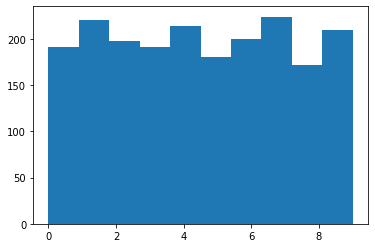

In [ ]:
# We should make sure that the distribution is more or less uniform across our samples
plt.hist(train_labels)
plt.show()

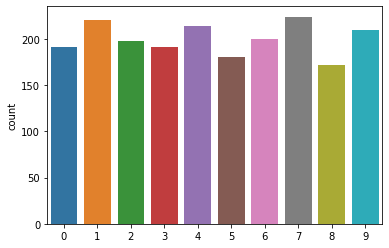

In [ ]:
countplot(x=train_labels) # it looks better than matplotlib histogram

Let's see some more examples from all classes.

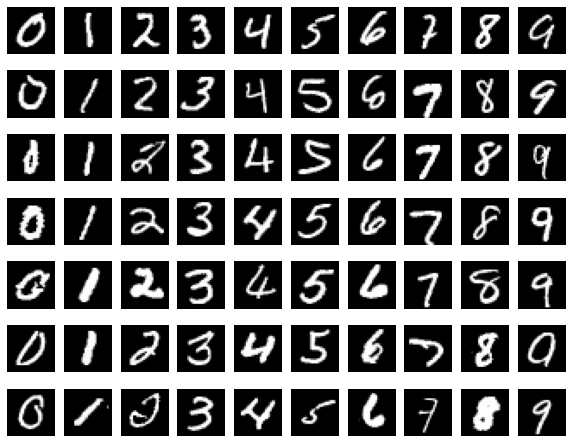

In [ ]:
# "Names" of classes:
classes =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

num_classes = len(classes)
samples_per_class = 7
fig, axs = plt.subplots(samples_per_class, num_classes, figsize=(10.0, 8.0))

for i in range(num_classes):
  # select ids of images that correspond to given class
  idxs = np.flatnonzero(train_labels == i)

  # select a random subset of size samples_per_class
  idxs = np.random.choice(idxs, samples_per_class, replace=False)

  # visualise
  for j, id in enumerate(idxs):
    axs[j, i].imshow(train_images[id], cmap='gray')
    axs[j, i].axis('off')
plt.show()

### Implementing the Nearest Neighbour algorithm

The algorithm consists of the following three steps:
1. Compute distances to all points in the dataset;
2. Find the closest point; 
3. Report the corresponding label.

We should start with defining the distance function.

**Classroom exercise**: Let's define a distance function, let it be Eucledian distance ($L_2$) 

$$L_2 = \sqrt{\sum{(x_1 - x_2)^2}}$$



In [ ]:
def dist(img1, img2):
  ##### YOUR CODE STARTS #####
  return np.sqrt(np.sum((img1-img2)**2))
  ##### YOUR CODE ENDS ##### 

Check the validity of the function here:

In [ ]:
print(f"Distance between first two images is {dist(train_images[0], train_images[1])} and should be about 9.36")

Distance between first two images is 9.361222132577327 and should be about 9.36


You can play with the defined function below. Check that the distance between images of the same digit is typically smaller than the distance between images of different digits.

In [ ]:
print(f"Distance between two images with the same class ({train_labels[3]} and {train_labels[6]}) is {dist(train_images[3], train_images[6])}")
print(f"Distance between two images with different classes ({train_labels[0]} and {train_labels[1]}) is {dist(train_images[0], train_images[1])}")

Distance between two images with the same class (1 and 1) is 9.232676037047709
Distance between two images with different classes (5 and 0) is 9.361222132577327


Let's remind us the steps of the NN algorithm:

1. Compute distances to all points in the dataset;
2. Find the closest point; 
3. Report the corresponding label.

Now that we know the distance function, we can build the rest of the algorithm.

**Classroom exercise**: Implement the three steps.

We shall do it gently. First we pick a sample image that we will be classifying. Let us say that the first image from the `test_images` is an unknown image sent by our friend:

In [ ]:
# an unseen image
test_image = test_images[1] 
test_label = test_labels[1]

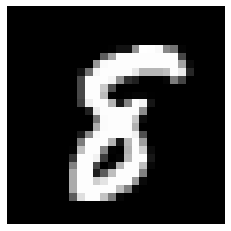

In [ ]:
plt.imshow(test_image, plt.get_cmap('gray'));
plt.axis('off')
plt.show()

**Classroom exercise:** compute all distances from the `test_image` to the `train_images` in the dataset

In [ ]:
##### YOUR CODE STARTS #####
# for loop style
distances = []
for img in train_images:
    distance = dist(test_image,img)
    distances.append(distance)

# list comprehension version
# [<expression with element> for <element> in <list/array>]
all_distances = [dist(test_image,img) for img in train_images]
print(all_distances[:5])
##### YOUR CODE ENDS #####

[8.688258968642103, 9.92283724354772, 11.886621248524845, 8.865886134353856, 9.589719601218196]


Now let's find out which image is closest to our `test_image`

In [ ]:
i = np.argmin(all_distances)

Almost done, now report a label with index `i` in `train_labels`

In [ ]:
predicted_label = train_labels[i]

Compare it to the true label of the first image in the `train_labels`

In [ ]:
print(f"Predicted class for the first image is {predicted_label} and the true label is {test_label}")

Predicted class for the first image is 8 and the true label is 8


Here we can visualise the nearest in terms of the Eucledian distance image from the `train_images`

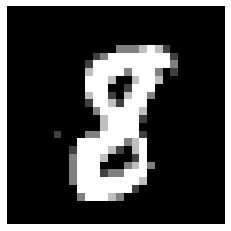

In [ ]:
plt.imshow(train_images[i], plt.get_cmap('gray'));
plt.axis('off')
plt.show()

**Classroom exercise:** Now we should make a function out of the code we have already written. 

In [ ]:
def classify(test_image):
  ##### YOUR CODE STARTS #####
  all_distances = [dist(test_image,img) for img in train_images]
  prediction = train_labels[np.argmin(all_distances)]
  ##### YOUR CODE ENDS ##### 
  return prediction

Let's test this function to verify that it works

In [ ]:
print(f"Predicted class for the first image is {classify(test_image)} and the true label is {test_label}")

Predicted class for the first image is 8 and the true label is 8


**Classroom exercise:** Classify all test images and store them into a separate variable `test_predicted`.

In [ ]:
##### YOUR CODE STARTS #####
test_predicted = [classify(img) for img in test_images]
# This will take time, why?
##### YOUR CODE ENDS ##### 

In [ ]:
test_predicted

[6,
 8,
 8,
 4,
 2,
 6,
 9,
 7,
 1,
 0,
 2,
 3,
 1,
 8,
 7,
 1,
 8,
 2,
 7,
 2,
 6,
 3,
 2,
 0,
 7,
 6,
 8,
 7,
 5,
 3,
 8,
 4,
 4,
 9,
 4,
 6,
 4,
 5,
 5,
 1,
 1,
 9,
 3,
 8,
 1,
 1,
 4,
 1,
 7,
 5,
 4,
 0,
 4,
 2,
 7,
 7,
 5,
 8,
 0,
 6,
 9,
 6,
 6,
 8,
 9,
 2,
 0,
 8,
 8,
 4,
 8,
 4,
 4,
 2,
 3,
 2,
 3,
 8,
 2,
 0,
 5,
 0,
 0,
 1,
 0,
 7,
 1,
 3,
 3,
 4,
 7,
 5,
 3,
 6,
 1,
 7,
 6,
 8,
 7,
 9,
 0,
 0,
 7,
 1,
 2,
 2,
 4,
 3,
 1,
 4,
 1,
 5,
 0,
 6,
 3,
 7,
 9,
 8,
 7,
 9,
 5,
 0,
 1,
 1,
 8,
 7,
 6,
 3,
 3,
 4,
 3,
 5,
 1,
 7,
 1,
 2,
 1,
 9,
 6,
 8,
 7,
 9,
 7,
 5,
 0,
 7,
 3,
 0,
 6,
 3,
 8,
 1,
 6,
 6,
 1,
 8,
 6,
 4,
 6,
 1,
 0,
 7,
 1,
 6,
 4,
 5,
 1,
 6,
 7,
 4,
 8,
 2,
 3,
 7,
 3,
 8,
 4,
 1,
 6,
 3,
 3,
 4,
 5,
 3,
 8,
 4,
 5,
 7,
 1,
 2,
 4,
 0,
 0,
 5,
 9,
 0,
 6,
 1,
 1,
 9,
 3,
 2,
 1,
 3,
 4,
 2,
 4,
 3,
 7,
 5,
 8,
 6,
 6,
 7,
 6,
 8,
 9,
 4,
 0,
 9,
 6,
 9,
 4,
 7,
 4,
 1,
 6,
 1,
 3,
 7,
 3,
 2,
 3,
 3,
 2,
 4,
 4,
 8,
 7,
 6,
 4,
 3,
 6,
 8,
 7,
 0,
 7,
 9,
 5,
 6,


How many instances from the test set the classifier has predicted correctly?

In [ ]:
np.sum(test_labels == test_predicted)

919

In [ ]:
n_correct = np.sum(test_labels == test_predicted)
print(f"Number of correctly predicted images is {n_correct}")

Number of correctly predicted images is 919


Now we will use **`accuracy`** (namely, proportion of correctly guessed classes) to estimate the performance of our nearest neighbor classifier. For that we need to divide number of correctly predicted images by total number of images.

In [ ]:
nn_accuracy = n_correct/len(test_labels)
print(f"Final accuracy of our nearest neighbor classifier is {nn_accuracy}. Not bad!")

Final accuracy of our nearest neighbor classifier is 0.919. Not bad!


Let's examine some of the missclassified examples.


This image with 3 was incorrectly predicted as 7


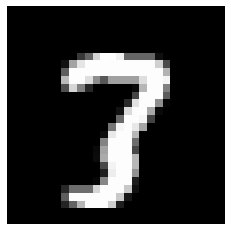

In [ ]:
missclassified = np.where(test_predicted != test_labels)[0]

# Set an index of missclassified instance you want to examine
index = 5

# Plot this instance as usual
img_matrix = test_images[missclassified[index]].reshape((28, 28))
plt.imshow(img_matrix, plt.get_cmap('gray'))
plt.axis('off')
print(f"This image with {test_labels[missclassified[index]]} was incorrectly predicted as {test_predicted[missclassified[index]]}")

### Scikit-learn

Now let us use the Scikit-Learn package to train the Nearest Neigbor classifier.

Most of the models that we are going to use are implemented in scikit-learn, for example KNN is available under the name `KNNeiborsClassifier`. All you need to do is to import it from `sklearn` (this a short name for scikit-learn).

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

Let's create an instance of the NN classifier by calling a `KNeighborsClassifier()` class. By default it produces a KNN classifier that we have discussed in the lecture. As an input parameter you can specify `k`. For example 10 nearest neighbour classifier is created like this:

In [ ]:
model = KNeighborsClassifier(n_neighbors = 10)
# what should be a value of k to produce NN classifier?

Most of the scikit-learn models have method `fit` that let you train the classifier given training instances and correct labels:

In [ ]:
model.fit(train_images.reshape(2000, 28*28), train_labels)

KNeighborsClassifier(n_neighbors=1)

**Classroom exercise:** Use trained nearest neighbor classifier (`model`) to predict `test_images` and then calculate the accuracy. How does it compare to the one we obtained in the class?

In [ ]:
##### YOUR CODE STARTS #####
test_predicted = model.predict(test_images.reshape(1000, 28*28))
n_correct = np.sum(test_labels == test_predicted)
##### YOUR CODE ENDS ##### 
print(f"Number of correctly predicted images is {n_correct}")

Number of correctly predicted images is 919


# Regression

## Small 2D example

Here we will create a small toy dataset for playing around with some regression algorithms.

In [ ]:
import numpy as np 
import pandas as pd

example_data = pd.DataFrame({'distance':[1,2,3,4,5], 'fare_amount':[2,4,5,4,5]})

In [ ]:
example_data

,distance,fare_amount
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


You can access columns using `.` notation and name of the column, e.g.:

In [ ]:
example_data.fare_amount

0    2
1    4
2    5
3    4
4    5
Name: fare_amount, dtype: int64

The following is our attempt to reproduce figures exactly as in lecture slides. Never mind, you will be able to use regular `matplotlib` as before if you like.

In [ ]:
# Plotting as in ggplot2
!pip install -q plotnine # -q for quiet output 
from plotnine import *

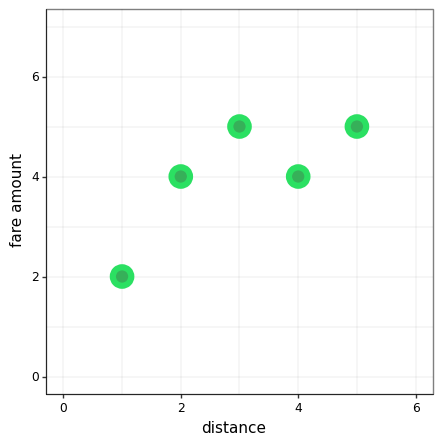

<ggplot: (8739887550645)>

In [ ]:
fig = (
    # Specifying data to be visualised:
    ggplot(data = example_data,
          # what is on x-axis and on y-axis
          mapping = aes(x = 'distance', y = 'fare_amount')) + 
    
    # "+" is needed to glue together difference parts of the pipeline
    
    # what is geometric primitive we are drawing - points!
    geom_point(fill = '#36B059', size = 5.0, stroke = 2.5, colour = '#2BE062', shape = 'o') +
    
    # all the rest is not important
    # these are just things to make figure look nice.
    
    labs(
        title ='',
        x = 'distance',
        y = 'fare amount',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

### Linear regression on a toy example
**Classroom exercise**: find value of **`intercept`** and **`slope`** (`w1`) using the equation of the line (`y = intercept + slope*x`) and the formulas provided below. Remember that in this example `x` is `distance` and `y` is `fare_amount`.

$$\omega_1 = \frac{\sum_{i=1}^{n}{(x_{i} - \bar{x})(y_{i} - \bar{y})}}{\sum_{i=1}^{n}{(x_{i} - \bar{x})^{2}}}$$
$$\omega_{0}=\bar{y}-\omega_{1}\bar{x},$$
where $\bar{x}$ and $\bar{y}$ are the mean values of $\textbf{x}$ and $\textbf{y}$ vectors correspondingly.

In [ ]:
##### YOUR CODE STARTS #####
x = example_data.distance
y = example_data.fare_amount

w1 = (np.sum((x-np.mean(x))*(y-np.mean(y))))/np.sum((x-np.mean(x))**2)
intercept = np.mean(y) - w1*np.mean(x)
##### YOUR CODE ENDS ##### 
print(f"w1 = {w1}; intercept = {intercept}, while the correct values are w1 = 0.6 and intercept = 2.2")

w1 = 0.6; intercept = 2.2, while the correct values are w1 = 0.6 and intercept = 2.2


We can now plug in these coefficients to visually examine regression line that we have computed

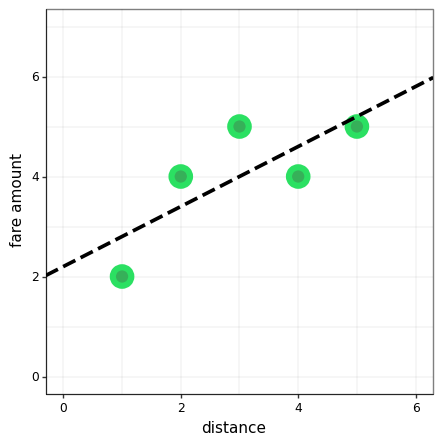

<ggplot: (8739887412145)>

In [ ]:
fig + geom_abline(intercept=intercept, slope=w1, color="black", linetype="dashed", size=1.5)

We can compare our regression line with a regression line computed by Python

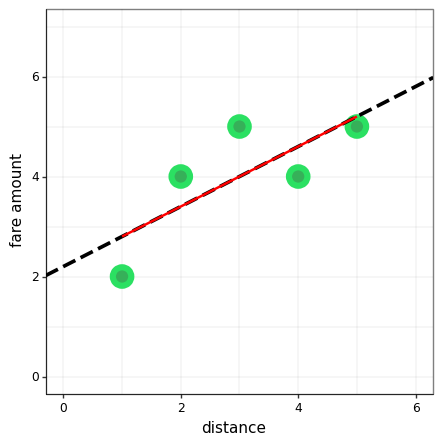

<ggplot: (8739887377401)>

In [ ]:
fig + geom_abline(intercept=intercept, slope=w1, color="black", linetype="dashed", size=1.5) + geom_smooth(method='lm', se=False, colour='red')

### Decision tree (DT) algorithm
We will borrow DT algorithm from sklearn package as linear regression. Sklearn has both `DecisionTreeRegressor` and `DecisionTreeClassifier` at its disposal. For now, let's use regressor.

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dtr = DecisionTreeRegressor(max_depth=1)

we use function `fit` to train newly created DT instance on our `example_data`

In [ ]:
dtr.fit(X=np.expand_dims(example_data.distance,axis=1), y=example_data.fare_amount)

DecisionTreeRegressor(max_depth=1)

### Creating a synthetic test set that would cover up the whole space

In [ ]:
x = example_data.distance
y = example_data.fare_amount

In [ ]:
 np.repeat(x, 71).shape

(355,)

In [ ]:
test_data = pd.concat([pd.DataFrame({'distance': np.repeat(x, 71), 'fare_amount': np.linspace(start=0, stop=7, num=71)}) for x in np.linspace(start=0, stop=6, num=61)])
test_data.head()

,distance,fare_amount
0,0.0,0.0
1,0.0,0.1
2,0.0,0.2
3,0.0,0.3
4,0.0,0.4


In [ ]:
test_data['predicted_amount'] = dtr.predict(np.array(test_data.distance).reshape(-1, 1))

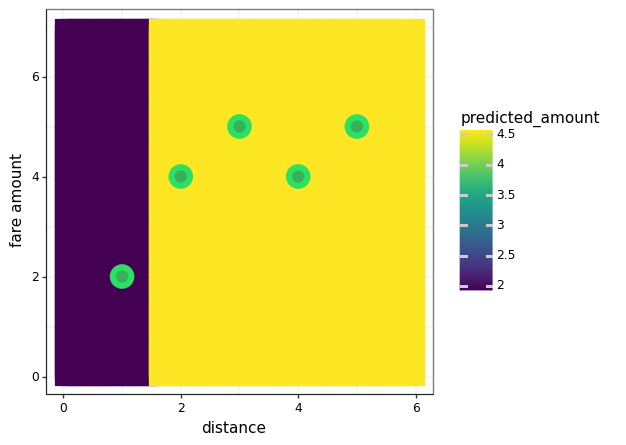

<ggplot: (8748806635921)>

In [ ]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'distance', y = 'fare_amount')) +
    geom_point(data = test_data, mapping = aes(x = 'distance', y = 'fare_amount', size = 5.0, colour = 'predicted_amount'), shape = 's') +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'distance',
        y = 'fare amount',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig

[Text(0.5, 0.75, 'X[0] <= 1.5\nsquared_error = 1.2\nsamples = 5\nvalue = 4.0'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.75, 0.25, 'squared_error = 0.25\nsamples = 4\nvalue = 4.5')]

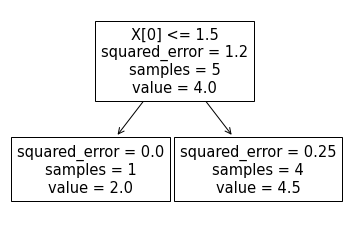

In [ ]:
# Let's visualize the resulting decision tree
plot_tree(dtr)